<a href="https://colab.research.google.com/github/fitriindra/ML-Zoomcamp-2022/blob/main/ML_Zoomcamp_Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

--2022-09-28 08:41:21--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.09s   

2022-09-28 08:41:21 (15.8 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [2]:
housing_df = pd.read_csv("housing.csv")

# Features
For the rest of the homework, you'll need to use only these columns:
```
'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value',
'ocean_proximity'
```


Select only them.

In [3]:
housing_df = housing_df[['latitude',
                        'longitude',
                        'housing_median_age',
                        'total_rooms',
                        'total_bedrooms',
                        'population',
                        'households',
                        'median_income',
                        'median_house_value',
                        'ocean_proximity']]

In [4]:
housing_df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#Data preparation


*   Select only the features from above and fill in the missing values with 0.
*   Create a new column `rooms_per_household` by dividing the column `total_rooms` by the column `households` from dataframe.
* Create a new column `bedrooms_per_room` by dividing the column `total_bedrooms` by the column `total_rooms` from dataframe.
* Create a new column `population_per_household` by dividing the column `population` by the column `households` from dataframe.

In [5]:
housing_df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
housing_df['total_bedrooms'] = housing_df.total_bedrooms.fillna(0)

In [7]:
housing_df['rooms_per_household'] = housing_df['total_rooms']/housing_df['households']
housing_df['bedrooms_per_room'] = housing_df['total_bedrooms']/housing_df['total_rooms']
housing_df['population_per_household'] = housing_df['population']/housing_df['households']

In [8]:
housing_df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


#Question 1
What is the most frequent observation (mode) for the column `ocean_proximity`?

In [9]:
housing_df['ocean_proximity'].mode()

0    <1H OCEAN
dtype: object

#Question 2
* Create the correlation matrix for the numerical features of your train dataset.

In a correlation matrix, you compute the correlation coefficient between 
every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

In [10]:
corr = housing_df.corr()
corr

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
latitude,1.000000,-0.924664,0.011173,-0.036100,-0.065318,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.104112,0.002366
longitude,-0.924664,1.000000,-0.108197,0.044568,0.068082,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.084836,0.002476
housing_median_age,0.011173,-0.108197,1.000000,-0.361262,-0.317063,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.125396,0.013191
total_rooms,-0.036100,0.044568,-0.361262,1.000000,0.920196,0.857126,0.918484,0.198050,0.134153,0.133798,-0.174583,-0.024581
total_bedrooms,-0.065318,0.068082,-0.317063,0.920196,1.000000,0.866266,0.966507,-0.007295,0.049148,0.002717,0.122205,-0.028019
population,-0.108785,0.099773,-0.296244,0.857126,0.866266,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.031397,0.069863
households,-0.071035,0.055310,-0.302916,0.918484,0.966507,0.907222,1.000000,0.013033,0.065843,-0.080598,0.059818,-0.027309
median_income,-0.079809,-0.015176,-0.119034,0.198050,-0.007295,0.004834,0.013033,1.000000,0.688075,0.326895,-0.573836,0.018766
median_house_value,-0.144160,-0.045967,0.105623,0.134153,0.049148,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.238759,-0.023737
rooms_per_household,0.106389,-0.027540,-0.153277,0.133798,0.002717,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.387465,-0.004852


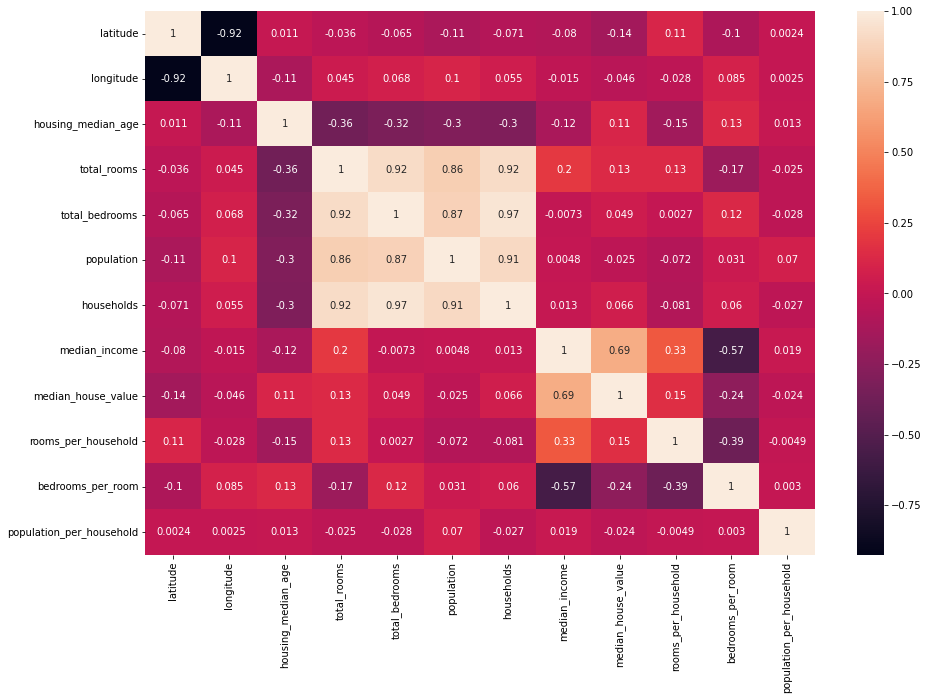

In [11]:
import seaborn as sns
plt.figure(figsize=(15,10))  
sns.heatmap(corr,annot=True)
plt.show()

# Make median_house_value binary
* We need to turn the `median_house_value` variable from numeric into binary.
* Let's create a variable above_average which is 1 if the `median_house_value` is above its mean value and 0 otherwise.

# Split the data
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to 42.
* Make sure that the target value (`median_house_value`) is not in your dataframe.

# Question 3
* Calculate the mutual information score between above_average and ocean_proximity . Use the training set only.
* Round it to 2 decimals using `round(score, 2)`
* What is their mutual information score?

In [12]:
housing_df['above_average'] = np.where(housing_df['median_house_value'] >= housing_df['median_house_value'].mean(), 1, 0)

In [13]:
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(housing_df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [14]:
print("full data: ", len(housing_df))
print("train data: ", len(df_train))
print("val data: ", len(df_val))
print("test data: ", len(df_test))


full data:  20640
train data:  12384
val data:  4128
test data:  4128


In [15]:
housing_df_copy = housing_df.drop('median_house_value', axis=1)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [16]:
from sklearn.metrics import mutual_info_score
cols = ['above_average', 'ocean_proximity']

def calculate_mi(series):
    return mutual_info_score(series, df_train.above_average)

df_mi = df_train[cols].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

In [17]:
df_mi

,MI
above_average,0.675982
ocean_proximity,0.101384


# Question 4
* Now let's train a logistic regression
* Remember that we have one categorical variable `ocean_proximity` in the data. Include it using one-hot encoding.
* Fit the model on the training dataset.
** To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
** `model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [18]:
housing_df_copy.head(5)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,6.984127,0.146591,2.555556,1
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,6.238137,0.155797,2.109842,1
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,8.288136,0.129516,2.802260,1
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,5.817352,0.184458,2.547945,1
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,6.281853,0.172096,2.181467,1


In [19]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

numeric_cols = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']

train_dict = df_train[numeric_cols + ['ocean_proximity']].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

In [20]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

val_dict = df_val[numeric_cols + ['ocean_proximity']].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict(X_val)

accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

0.84


# Question 5
* Let's find the least useful feature using the feature elimination technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
* Which of following feature has the smallest difference?
`total_rooms`
`total_bedrooms`
`population`
`households`

Note: the difference doesn't have to be positive

In [21]:
features = numeric_cols + ['ocean_proximity']
features

['latitude',
 'longitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household',
 'ocean_proximity']

In [22]:
original_score = accuracy


for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(c, original_score - score)

latitude 0.00618217054263559
longitude 0.009089147286821642
housing_median_age 0.009089147286821642
total_rooms 0.0015794573643410637
total_bedrooms 0.002306201550387521
population 0.013691860465116279
households 0.006666666666666599
median_income 0.05438953488372089
rooms_per_household 0.005697674418604581
bedrooms_per_room 0.004486434108527115
population_per_household 0.004486434108527115
ocean_proximity 0.019021317829457374


#Question 6
* For this question, we'll see how to use a linear regression model from Scikit-Learn
* We'll need to use the original column '`median_house_value`'. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model (`model = Ridge(alpha=a, solver="sag", random_state=42)`) on the training data.
* This model has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`
* Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest alpha.

In [23]:
housing_df['median_house_value'] = np.log1p(housing_df['median_house_value'])

In [24]:
df_train_full, df_test = train_test_split(housing_df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [25]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [28]:
train_dict = df_train[numeric_cols + cols].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val[numeric_cols + cols].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [29]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, round(score, 3))

0 0.524
0.01 0.524
0.1 0.524
1 0.524
10 0.524
